In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
dataset=loadtxt('pima-indians-diabetes.csv',delimiter=',')
dataset.shape
X=dataset[:,0:8]
y=dataset[:,8]

In [ ]:
mlp = Sequential()
mlp.add(Dense(16,input_dim=12,activation='relu'))     #input + hidden layer
mlp.add(Dense(32,activation='relu'))
mlp.add(Dense(8,activation='relu',use_bias=False))                 #hidden 2 layer
mlp.add(Dense(5,activation='softmax'))              #outuput layer
mlp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                208       
                                                                 
 dense_9 (Dense)             (None, 32)                544       
                                                                 
 dense_10 (Dense)            (None, 8)                 256       
                                                                 
 dense_11 (Dense)            (None, 5)                 45        
                                                                 
Total params: 1,053
Trainable params: 1,053
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlp.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
mlp.fit(X,y,epochs=50,batch_size=10)

In [ ]:
_,accuracy=mlp.evaluate(X,y)

print("Accuracy:",accuracy)

24/24 [==============================] - 0s 2ms/step - loss: 0.4495 - accuracy: 0.7786
Accuracy: 0.7786458134651184


In [ ]:
predictions = (mlp.predict(X) > 0.5).astype(int)
for i in range(5):
  print(X[i].tolist(),predictions[i],y[i])

24/24 [==============================] - 0s 2ms/step
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] [1] 1.0
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] [0] 0.0
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] [1] 1.0
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] [0] 0.0
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] [1] 1.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=18)
X_train.shape
X_test.shape


(154, 8)

In [ ]:
history=mlp.fit(X_train,y_train,validation_split=0.1,epochs=250)


In [ ]:
scores=mlp.evaluate(X_train,y_train)
print("Training Accuracy:",scores[1]*100)

scores=mlp.evaluate(X_test,y_test)
print("Test Accuracy:",scores[1]*100)

#Test ve train accuracy arasında farklar var. Bunu düşürmek için modeli biraz daha küçültebiliriz.
#Birkaç katmanı çıkartıyoruz.



20/20 [==============================] - 0s 2ms/step - loss: 0.1309 - accuracy: 0.9674
Training Accuracy: 96.74267172813416
5/5 [==============================] - 0s 3ms/step - loss: 1.5794 - accuracy: 0.7013
Test Accuracy: 70.1298713684082


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


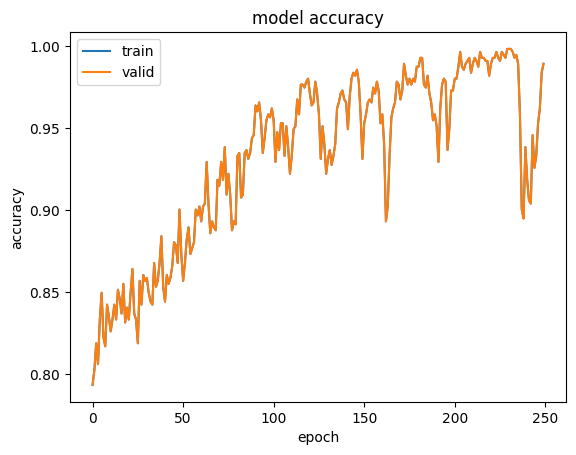

<function matplotlib.pyplot.show(close=None, block=None)>

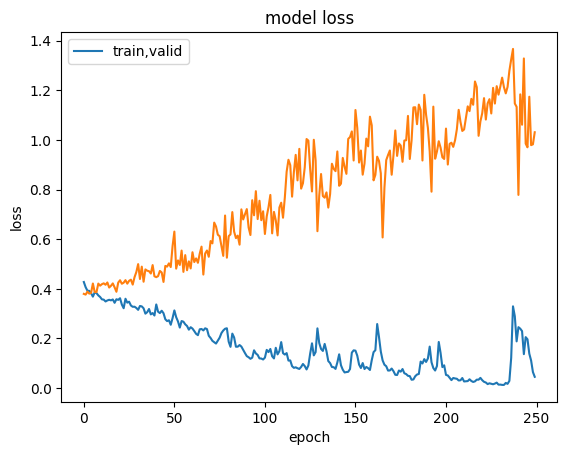

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())

#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train,valid'],loc='upper left')
plt.show

5/5 [==============================] - 0s 12ms/step
[[79 16]
 [32 27]]
0.4576271186440678
0.4576271186440678


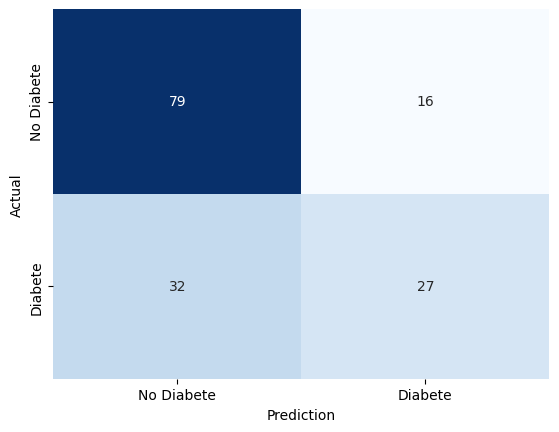

In [ ]:
#Sonuçta accuracy,sensitivity gibi hesaplamalar yapacaksak confusion matrixe
#ihtiyacımız var.
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt

#Tahminlerin oluşması için x testi yollayacağız.

pred_test = mlp.predict(X_test)

#pred_teste bakalım içinde neler var.
pred_test

#Bu sayıları olması gereken y test ile bu haliyle karşılaştıramıyoruz.
#Bu sayıları, olması gereken y testi ile karşılaştırmamız için;
#y_pred diye boş bir liste oluşturalım.
y_pred=[]

#Bu bir ikili sınıflandırma problemi.Çıktı sigmoid fonksiyonundan geçiyor.Sigmoid fonksiyonuda
#0 ile 1 arasında değerler üretiyor. 0-1 arasında 0.5 thresholdu kullanırsak 0.5'in üstündekiler
#1 olarak, altındakiler 0 olarak görünebilir.
for i in pred_test:
  if(i>=0.5):
    y_pred.append(1)
  else:
    y_pred.append(0)

y_pred

#Artık bir liste haline geldi. Örnekleri artık birbiriyle kıyaslayabiliriz.
#y_test ile y_pred birbirine eşitmi değilmi diye bakıp kıyaslayıp sonuçlara göre değerlendirme
#yapabiliriz.

#cm ile confusion matris fonksiyonuna bakalım.
#ilk parametre true yani olması gereken değerler=y_test
#Sonra predictionları istiyor=y_pred
cm=confusion_matrix(y_test,y_pred)

print(cm)

#Confusion matrisimiz
#[[79 16]
# [32 27]]


# Burada bunların hangisi TP,hangisi FN hepsini belirlememiz lazım.
# Ezbere iş yapamayız.
# Burada bir hesaplama yapalım.Sensitivity'yi hesaplayalım.
#Confusion matriste dikkat etmemiz gereken şey şu;
#Biraz önceki örnekte üst kısma actual yan kısma predicted demiştik.Eğer tam tersi oluras
#TP ile TN yer değiştirir. O yüzden bu bizi yanıltabilir.
#Kerasın bunu nasıl çıktı verdiğine ve verilerin etiketine bakmamız lazım.
#recall score'u çağırdık

print(recall_score(y_test,y_pred))

#Recallu hesapladık.Pozitif örnekleri bulma başarısı 0.45 imiş.

#Şimdi bu 0.45i biz bulmaya çalışalım
#Eğer 79'u TP alsaydık ve FN bu durumda 32 olurdu. Bu değerlerden hesapladığımız recall 0.71 çıktı.
#Burada bi hata var çünkü ikisinin aynı olması lazım.
#Tam tersini deneyelim.27'yi deneyelim. 27/27+32. Şu an iki değerde aynısı çıktı.
print(27/(27+32))

#O zaman bu karmaşıklık matrisine göre 27:TP, 79:TN, 32:FN, 16:FP
#O halde yan(sol) taraf actual, üst taraf predicted.Bunu deneyerek buldum.

#Karmaşıklık matrisini görselleştirelim.Bunu import seaborn ile yapalım.

#Isı haritaları var heat mapler.İlk parametre confusion matrisimiz.
#Diğer parametremiz kolonlara vereceğimiz isimler.
#xticklabels ile x kolonlarına, yticklabelslar ile y kolonlarına vereceğimiz isimler.

ax=sns.heatmap(cm,annot=True,xticklabels=["No Diabete","Diabete"],yticklabels=["No Diabete","Diabete"],cbar=False,cmap="Blues")
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

#Nodiabetes, yani gerçekte diabet olmayıp sisteminde diabetsin dediği 79 kişi varmış.
#Bu diabet olmayanları tespit etme durumumuz yani TN.
#Gerçekte tahmin etmek istediğimiz kişiler diabet olanlar.
#Gerçekte diabet olup sisteminde diabetsin dediği kişi 27 tane : TP
#Gerçekte diabet olup sistemin diabet değilsin dediği kişi:32:FN
#Gerçekde diabet olmayıp sistemin diabetsin dediği kişi sayısı:16:FP

#Yandaki barları göstermek istemiyosak cbar=false diyebiliriz.cmap ile rengini ayarlayabiliriz.




In [ ]:
#Bu confusion matrisi kullanarak kendi hesaplamalarımızı yapabiliriz.
#Precision score'u otomatik hesaplatalım birde kendimiz hesaplayalım.

print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

#Hocada fp ve fn eşit olduğu için recall ve precision aynı çıktı.
#Kendimiz specifity'yi hesaplayalım.

#Pozitif predicted value = Toplam etiklediği pozitifler içerisinden gerçekte kaçı pozitif = TP(TP+FP)
#Negatif predicted value = Toplam etiklediği negatifler içerisinden gerçekte kaçı negatif = TN(TN+FN)

#Specifity TN/TN+FP
#TN=79 idi.Bu aynı zamanda cm[0][0]'a eşit.
#FP=16 idi.Buda cm[0][1]'e eşit.

print("Specifity:",cm[0][0]/(cm[0][0]+cm[0][1]))

#Recallu kendimiz hesaplayalım.
#TP = cm[1][1] && FN = cm[1][0
print("Recall:",cm[1][1]/(cm[1][1]+cm[1][0]))



#F1 score'uda kendim hesaplayım.
#F1 = 2 * (precision * recall) / (precision + recall)
#Precision=tp / (tp + fp)
print(f1_score(y_test,y_pred))

sensitivity=cm[1][1]/(cm[1][1]+cm[1][0])
precision=cm[1][1]/(cm[1][1]+cm[0][1])
print("F1 Score:",2*sensitivity*precision/(sensitivity+precision))

0.4576271186440678
0.627906976744186
Specifity: 0.8315789473684211
Recall: 0.4576271186440678
0.5294117647058824
F1 Score: 0.5294117647058824
